# Introduction to Modern Mathematical Modeling
# Chapter 6; Mathematical Modeling By Calculus

Many ways to model real-life phenomena with math is through the use of
calculus and, especially, differential equations. There will be some
programming in this chapter, but our main focus will be calculus with
some examples in LaTeX.


The figure on page 110 of the textbook shows two pipes pumping fluid into
a tank and one pipe draining fluid from the tank. One in-flow pipe pumps
in pure water at rate of 8 gal/min, one dispenses brine water with a
concentration 0.5 lb/gal at a rate of 2 gal/min, and the drain rate is 10
gal/min. Initially, the tank has 80 gallons of water with 40 lbs of salt
dissolved into it. Because of the pure water dilution, is it possible that
the water in the tank will reach (or approach) a salt concentration of 0?
If not, what is the asymptotic concentration of salt in the tank as time
goes to infinity?

The general principle for this kind of mixture problem is the conservation
of mass of the interested material. In our case, it is the salt. Let $x$ be
the amount of salt in the tank, let $t$ represent time where $t = 0$ is the
starting time for this problem. This means our initial condition is $x(0) =
40$ pounds, and the differential equation that governs this problem is:

\begin{align*}
\frac{dx}{dt} &= \text{in-flow} - \text{out-flow} \\
&= 2\frac{\text{gal}}{\text{min}}\cdot0.5\frac{\text{lbs.}}{\text{gal}} -
10\frac{\text{gal}}{\text{min}}\cdot \frac{x}{80}
\frac{\text{lbs.}}{\text{gal}}\\
&= \left(1-\frac{x}{8}\right)\frac{\text{lbs.}}{\text{min}}
\end{align*}

Which, if we momentarily ignore units, is $\frac{dx}{dt} = 1 - \frac{x}{8}$.
Gut check: The reason units are included above is to help make sure that the
differential equation makes sense. If $dx/dt$ represents the change of mass
of salt per minute, then, naturally, it's units are in pounds per minute.
The other side of the equation must match those units as well, which we have
determined is the case.

This differential equation can be solved using separation of variables,
which means it can be re-written in the form $f(x)\ dx = g(t)\ dt$
and then completed with integration; but you may also notice that it is a
first-order non-homogeneous linear differential equation, and so it can be
solved using an integrating factor. Which is what we will do by rewriting
the differential equation:

$$\frac{dx}{dt} + \frac{x}{8} = 1$$

The integrating factor $\mu(t) = e^{\int \frac{1}{8}\ dt} = e^{\frac{t}{8}}$
will allow us to exploit the product rule:

\begin{align*}
\frac{dx}{dt} + \frac{x}{8} &= 1 \\
\mu(t)\left(\frac{dx}{dt} + \frac{x}{8}\right) &= \mu(t)\\
\mu(t)\frac{dx}{dt} + \mu(t)\frac{x}{8} &= \mu(t) \\
\frac{dx}{dt}e^{\frac{t}{8}} + \frac{x}{8}e^{\frac{t}{8}} &= e^{\frac{t}{8}} \\
\frac{d}{dt}\left(xe^{\frac{t}{8}}\right) &= e^{\frac{t}{8}} \\
\int \frac{d}{dt}\left(xe^{\frac{t}{8}}\right)\ dt &= \int e^{\frac{t}{8}}\ dt \\
xe^{\frac{t}{8}} &= 8e^{\frac{t}{8}} + C \\
x(t) &= 8 + Ce^{-\frac{t}{8}}
\end{align*}

Here $C$ is our constant of integration, and we can find it's value by using
our initial condition.

$$x(0) = 40 = 8 + C \implies C = 32$$

Then the unique solution is $x(t) = 32e^{-\frac{t}{8}} + 8$, and we can
start answering the questions above. To determine the asymptotic behavior
regarding the amount of salt, we need only find the limit of $x(t)$ as
$t \to \infty$:

$$\lim_{t\to\infty} x(t) = \lim_{t\to\infty}\left[32e^{-\frac{t}{8}} + 8\right] = 8$$

Considering that that total in-flow (pure and salt water) is equal to the
total out-flow, the tank will always have the same amount of water in it
for all time; and since the amount of salt in the water never reaches 0,
the least salty the water could become is about $\frac{1}{8}$ pounds per
gallon. This asymptotic behavior is shown graphically below.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
import netCDF4
import sympy as smp
from sympy.utilities.lambdify import lambdify
import warnings
warnings.filterwarnings("ignore")

styledict = {'xtick.labelsize':25,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':25,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

In [68]:
t = np.linspace(0, 40, 51)
x = 32*np.exp(-t/8.) + 8
# t is 51 evenly spaced points from 0 to 40, and x is the solution
# to our differential equation.

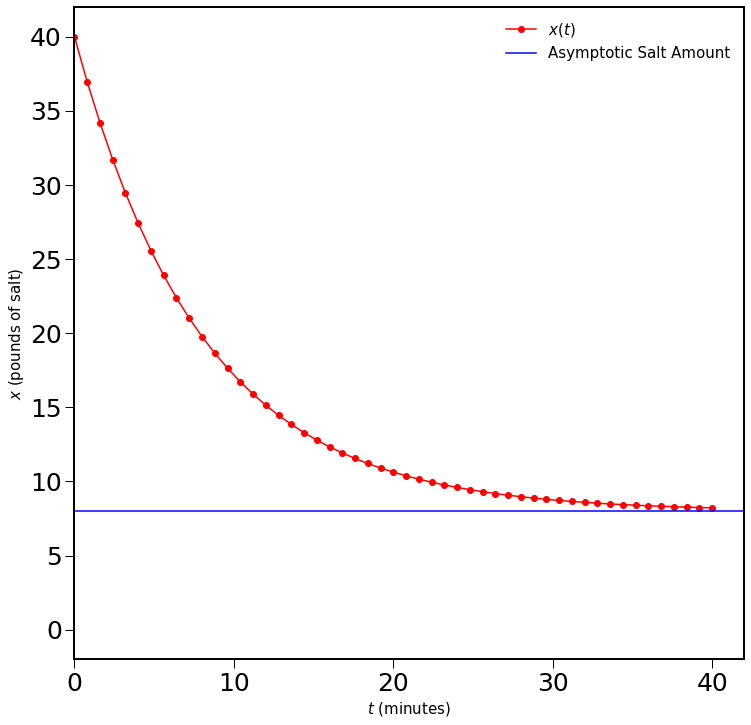

In [69]:
plt.figure(figsize=(12,12))

plt.plot(t,x, 'ro-', label="$x(t)$")
plt.axhline(y=8, xmin=0, xmax=1, color = "blue",
            label="Asymptotic Salt Amount")
# plt.axhline allows you to plot a simple horizontal line with the
# given y coordinate.
plt.xlabel("$t$ (minutes)", size=15)
plt.ylabel("$x$ (pounds of salt)", size=15)
plt.legend(loc='best', fontsize=15)
plt.ylim(-2,42)
plt.xlim(0, )

plt.savefig("CH6;SaltMixtureProblem.jpg")

In [71]:
pfr = lambda r: 6*np.pi*r**3 + 9.4*np.pi*r**2 - 1456.88
# We've seen lambda functions before, but as a something that other
# functions returned. A lambda function is basically a one line
# function that can be defined in a script. The symbols after the
# word 'lambda' act as the internal variable(s), and everything
# after the ':' is what is executed and returned. They support
# multiple inputs and vectorization, as well.

opt.bisect(pfr, 0, 8)
# Finding a root of the pfr function with opt.bisect.

3.796288736461065

In [72]:
nc = netCDF4.Dataset("raob_soundings22566.cdf", 'r+', "NETCDF4")
# Dataset is from the netCDF4 package and allows you to read in '.cdf' files,
# a special file-type meant for encoding high dimensional numerical data.

print(nc)
# printing the Dataset object gives you information about its dimensions and
# the nature of it's content.

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    comment0: First mandatory level is surface level
    version: Forecast Systems Lab 1.3
    dimensions(sizes): recNum(1), manLevel(22), sigTLevel(250), sigWLevel(150), mWndNum(5), mTropNum(4), staNameLen(6)
    variables(dimensions): int32 wmoStat(recNum), int32 wbanStat(recNum), |S1 staName(recNum,staNameLen), float32 staLat(recNum), float32 staLon(recNum), float32 staElev(recNum), float64 synTime(recNum), int32 numMand(recNum), int32 numSigT(recNum), int32 numSigW(recNum), int32 numMwnd(recNum), int32 numTrop(recNum), float64 relTime(recNum), int32 sondTyp(recNum), float32 prMan(recNum,manLevel), float32 htMan(recNum,manLevel), float32 tpMan(recNum,manLevel), float32 tdMan(recNum,manLevel), float32 wdMan(recNum,manLevel), float32 wsMan(recNum,manLevel), float32 prSigT(recNum,sigTLevel), float32 htSigT(recNum,sigTLevel), float32 tpSigT(recNum,sigTLevel), float32 tdSigT(recNum,sigTLevel)

In [73]:
def price_fun(cee, bee, es):
    """
    Return a lambda function with the appropriate
    parameters as the price function.
    """
    return lambda x: (cee*30*np.cos((x-bee)/2))/(x+es)**2

def revenue_fun(cee, bee, es):
    """
    Return a lambda function with the appropriate
    parameters as the revenue function.
    """
    return lambda x: x*(cee*30*np.cos((x-bee)/2))/(x+es)**2

# Defining functions to return lambda functions can be useful for
# modularizing code.

In [74]:
c = 1e1 # This is scientific notation and represents 1 * 10**1
b = 8.5
s = 1

x = np.linspace(7.5, 11., 100)
price = price_fun(c,b,s)
revenue = revenue_fun(c,b,s)
# Here we create our functions with the specified parameters.

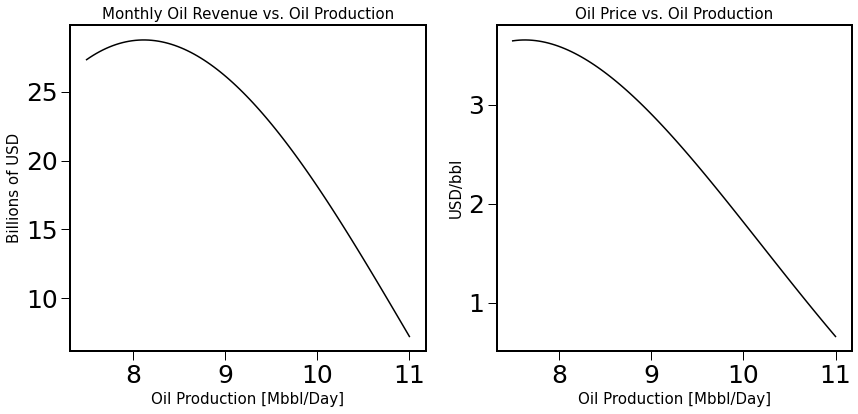

In [75]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(x, revenue(x), 'k-')
ax[0].set_ylabel("Billions of USD",size = 15)
ax[0].set_xlabel("Oil Production [Mbbl/Day]", size = 15)
ax[0].set_title("Monthly Oil Revenue vs. Oil Production", size=15)

ax[1].plot(x, price(x), 'k-')
ax[1].set_ylabel("USD/bbl",size = 15)
ax[1].set_xlabel("Oil Production [Mbbl/Day]", size = 15)
ax[1].set_title("Oil Price vs. Oil Production", size=15)

plt.savefig("CH6;OilRevenueVsProduction.jpg")

In [76]:
t = smp.Symbol('t')
# Here we make 't' a sympy symbol.

f = (c*30*t*smp.cos((t-b)/2))/(t+s)**2
# Now, we create a sympy function using t and our other python
# variables.

fPrime = smp.diff(f,t)
# Then, we use sympy to find the derivative of f.
fPrime

-150.0*t*sin(t/2 - 4.25)/(t + 1)**2 - 600.0*t*cos(t/2 - 4.25)/(t + 1)**3 + 300.0*cos(t/2 - 4.25)/(t + 1)**2

In [77]:
fP = lambdify(t, fPrime)
# Lastly, we use lambdify to turn fPrime into a callable lambda function.
# This is a useful way to solve an optimization problem by calculus,
# especially when the derivative of a given function would be difficult
# to compute manually.

root = opt.bisect(fP, 7, 11)

print(f"Root of fP between 7 and 11: {root}")

Root of fP between 7 and 11: 8.120057445974453


In [78]:
Rm = f*smp.exp((t-10)/2)
RmP = lambdify(t, smp.diff(Rm, t))
# Here we do the same thing again, with a different function.
Rm

300.0*t*exp(t/2 - 5)*cos(t/2 - 4.25)/(t + 1)**2

In [79]:
root2 = opt.bisect(RmP, 7, 11)

print(f"Root of RmP between 7 and 11: {root2}")

Root of RmP between 7 and 11: 9.8913633359316


In [80]:
def rad_energy(T, eiche, kaibee, sea):
        return lambda lam: 1e-12*(2*eiche*sea**2)/(((1e-6*lam)**5)*(np.exp((eiche*sea)/(kaibee*(1e-6*lam)*T))-1))

In [81]:
h = 6.626070040e-34
kb = 1.3806488e-23
cl = 3e8

Ts = [5772, 5000, 4000]
fmt = ['b-', 'y-', 'r-']
lsty = ['--', '-', '.']
labs = ['T = 15 + 2 $\degree C$', 'T = 15 $\degree C$', 'T = 15 - 2 $\degree C$']
lamb = np.linspace(0, 3, 101)
lamb1 = np.linspace(0, 80, 101)
a3 = [True if .65 <= i < .8 else False for i in lamb]
a2 = [True if .53 <= i < .67 else False for i in lamb]
a1 = [True if .46 <= i < .55 else False for i in lamb]
areas = [a1,a2,a3]
cols = ['blue', 'yellow', 'red']
# All of these lists will be used for the plots below.

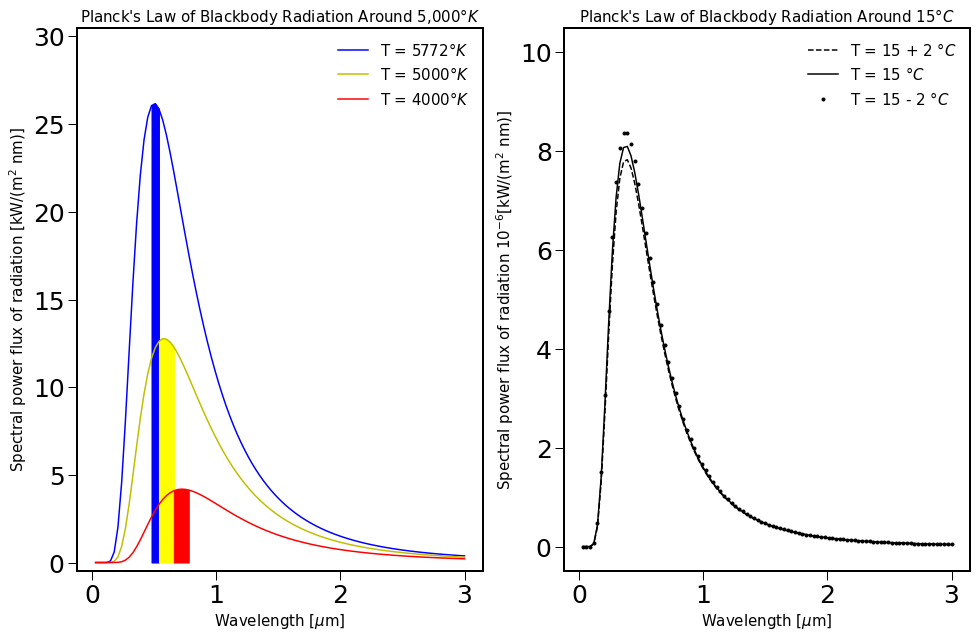

In [82]:
fig, ax = plt.subplots(1,2, figsize=(16,10))

# The for loop below uses the zip function to create a list of tuples
# to iterate through.
for (t, f, here, c) in zip(Ts, fmt, areas, cols):
    func = rad_energy(t, h, kb, cl)
    ax[0].plot(lamb, func(lamb), f, label=f"T = {t}$\degree K$")
    ax[0].fill_between(lamb, np.zeros(lamb.size),
                       func(lamb), where=here, color=c)
# ax.fill_between allows you to color a region between curves on
# a plot, 'where' is a list of booleans that specify where, along
# the axis, the curves are filled between.

ax[0].set_ylabel("Spectral power flux of radiation [kW/(m$^2$ nm)]", size=15)
ax[0].set_xlabel("Wavelength [$\mu$m]", size=15)
ax[0].set_title("Planck's Law of Blackbody Radiation Around 5,000$\degree K$",
                size=15)
ax[0].legend(loc='best', fontsize=15)
ax[0].set_ylim(0-.5, 30+.5)

for (t,f,l) in zip(np.linspace(-2, 2, 3),lsty, labs):
    func = rad_energy(288.15 + t, h, kb, cl)
    ax[1].plot(lamb, 1e6*func(lamb1), 'k'+f, label=l);
# String concatenation of 'k' and f to make a format string.

ax[1].set_ylabel("Spectral power flux of radiation $10^{-6}$[kW/(m$^2$ nm)]",
                 size=15)
ax[1].set_xlabel("Wavelength [$\mu$m]", size=15)
ax[1].set_title("Planck's Law of Blackbody Radiation Around 15$\degree C$",
                size=15)
ax[1].legend(loc='best', fontsize=15)
ax[1].set_ylim(0-.5, 10+.5);

plt.savefig("CH6;BlackbodyRadiationEnergy.jpg")
